In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from datetime import datetime

In [2]:
def value_at_risk(returns, confidence_level=.05):

    # Calculating VaR
    return returns.quantile(confidence_level, axis=0, interpolation='higher')


In [3]:
def expected_shortfall(returns, confidence_level=.05):
    
    # Calculating VaR
    var = value_at_risk(returns, confidence_level)
    
    # ES is the average of the worst losses (under var)
    return returns[returns.lt(var, axis=1)].mean()


In [4]:
yfin.pdr_override()
asset_close = pdr.get_data_yahoo('GDLC',start = '2020-05-01', end = '2021-06-30') # AUTOMATE DATES
asset_close = asset_close.drop(columns = ['High', 'Low', 'Close', 'Volume', 'Open'])
asset_close = asset_close.rename(columns = {'Adj Close': 'GDLC'})


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\44738\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\44738\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\44738\anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\44738\anaconda3\lib\site-packages\yfinance\multi.py", line 167, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "C:\Users\44738\anaconda3\lib\site-packages\yfinance\multi.py", line 179, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "C:\Users\44738\anaconda3\lib\site-packages\yfinance\base.py", line 157, in history
    data = data.json()
  File "C:\Users\44738\anaconda3\lib\site-packages\requests\models.py", line 898, in json
    return complexjson.loads(self.t

KeyboardInterrupt: 

In [182]:
ticker_returns = asset_close.copy().pct_change().dropna(axis=0)
ticker_returns

,GDLC
Date,
2020-05-01,-0.024390
2020-05-04,0.014706
2020-05-05,-0.021739
2020-05-06,-0.111111
2020-05-07,0.133333
...,...
2021-06-23,0.046977
2021-06-24,0.050119
2021-06-25,-0.087955


In [183]:
conficence_level = 0.05 
k = 0.02

In [184]:
ticker_returns['GDLC'] = ticker_returns['GDLC'].copy()
# ticker_returns.loc[ticker_returns['BTC'] < ticker_returns['BTC'].quantile(conficence_level), 'BTC2'] -= k


In [185]:
ticker_returns

,GDLC
Date,
2020-05-01,-0.024390
2020-05-04,0.014706
2020-05-05,-0.021739
2020-05-06,-0.111111
2020-05-07,0.133333
...,...
2021-06-23,0.046977
2021-06-24,0.050119
2021-06-25,-0.087955


In [186]:
var = value_at_risk(ticker_returns)

In [187]:
var

GDLC   -0.120871
Name: 0.05, dtype: float64

In [188]:
es = expected_shortfall(ticker_returns)

In [189]:
es

GDLC   -0.153905
dtype: float64

In [190]:
# sns.set(rc={"figure.figsize":(12, 8)})

C:\Users\jpawe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.165, 0.75, 'GDLC ES: -15.34%')

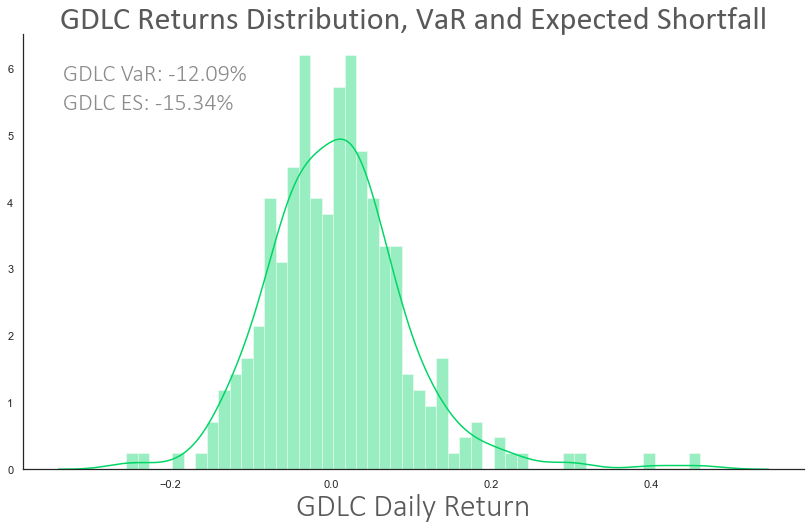

In [191]:
fig, ax = plt.subplots(figsize = (14,8))
sns.distplot(ticker_returns['GDLC'], color=(0/255, 214/255, 101/255), bins=50)
ax.set_ylabel('')
ax.set_xlabel ('GDLC Daily Return', fontsize = 32, fontname='Calibri', weight='light', color=(0,0,0,0.65))
ax.set_title('GDLC Returns Distribution, VaR and Expected Shortfall', fontsize = 32, fontname='Calibri', weight='normal', color=(0,0,0,0.65))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(x=0.165, y=0.80, s=f'GDLC VaR: -12.09%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':(0,0,0,0.45)})
fig.text(x=0.165, y=0.75, s=f'GDLC ES: -15.34%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':(0,0,0,0.45)})
